# Define the function to Ask Alexa and detect the answers

In [1]:
#Author: Sandip De
#Date: 13.04.2020
#email: 1sandipde@gmail.com

import sounddevice as sd
import os,time
import soundfile as sf
import speech_recognition as sr

from playsound import playsound

def ask_alexa(question_audio):

    r = sr.Recognizer()
    
    
    #Play the question 
    print ("Playing",end="")
    fs=44100
    sd.playrec(question_audio, fs, channels=1)
    time.sleep(2.8)
    
    
    
    # record answer from ALexa
    
    print('\r Recording',end='')

    duration = 8  # seconds
   
    myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1,blocking=True)    
#     time.sleep(5)
    
    # write audio to wav format file
    
    unique_filename = str(uuid.uuid4())

    sf.write('{}.wav'.format(unique_filename),samplerate=fs,data=myrecording)

    audiofile=sr.AudioFile('{}.wav'.format(unique_filename))
    
    
    
    # recognize the audio via google api and get all possible variation of the texts.
    
    with audiofile as source:
        audio=r.record(source)

    print('\rRecognising',end="")

    text=r.recognize_google(audio,show_all=True)
#     print(text)
    return text
 
  



def process_response(text):
    if len(text)>0:
        data=[t['transcript'] for t in text['alternative']]
        data=' '.join(data)
#         print(data)
        hl=['head','heads','hurts','hair','ahead','had','has','hairs','home']
        
        result='TAILS'
        
        for h in hl:
            if h in data.lower():

                result='HEADS'
                return result
                

           
        return result
    else:
        return "Failed"

# record question

In [540]:
fs=44100
duration=3

flip = sd.rec(int(duration * fs), samplerate=fs, channels=2)

## test playback

In [541]:
sd.playrec(flip, fs, channels=2)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

## Ask Alexa , Detect response, repeat .. ! 

In [588]:
responses=[]
full_response=[]
for i in range(100):
    
    text=ask_alexa(flip)
    full_response.append(text)    
    result=process_response(text)
    print("           {}       |  {}  | ".format(i,result))
    responses.append(result)

Recognising           0       |  HEADS  | 
Recognising           1       |  HEADS  | 
Recognising           2       |  TAILS  | 
Recognising           3       |  TAILS  | 
Recognising           4       |  HEADS  | 
Recognising           5       |  HEADS  | 
Recognising           6       |  TAILS  | 
Recognising           7       |  HEADS  | 
Recognising           8       |  TAILS  | 
Recognising           9       |  TAILS  | 
Recognising           10       |  HEADS  | 
Recognising           11       |  HEADS  | 
Recognising           12       |  TAILS  | 
Recognising           13       |  HEADS  | 
Recognising           14       |  HEADS  | 
Recognising           15       |  TAILS  | 
Recognising           16       |  TAILS  | 
Recognising           17       |  TAILS  | 
Recognising           18       |  HEADS  | 
Recognising           19       |  TAILS  | 
Recognising           20       |  TAILS  | 
Recognising           21       |  TAILS  | 
Recognising           22       |  HEADS  |

### Analyse results

In [598]:
import pandas as pd
df=pd.DataFrame(responses,columns=['result'])


In [599]:
df

,result
0,HEADS
1,HEADS
2,TAILS
3,TAILS
4,HEADS
...,...
95,TAILS
96,TAILS
97,TAILS
98,HEADS


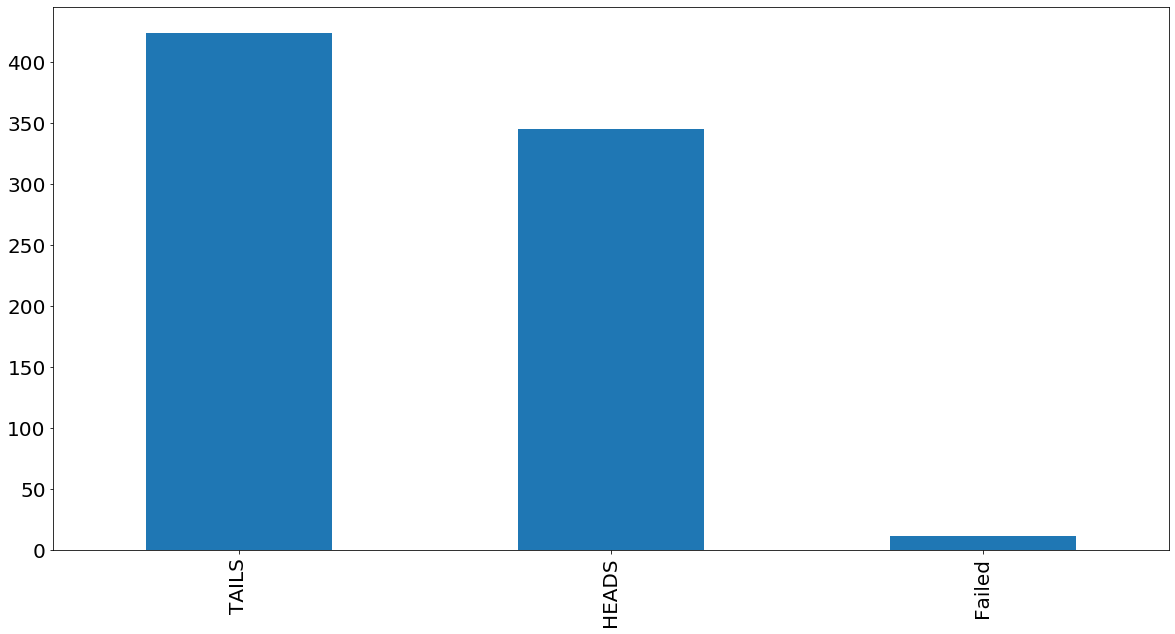

In [605]:
plt.figure(figsize=(20,10))

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
df['result'].value_counts().plot(kind='bar')